Consider the following ingredients for making sausages

<div>
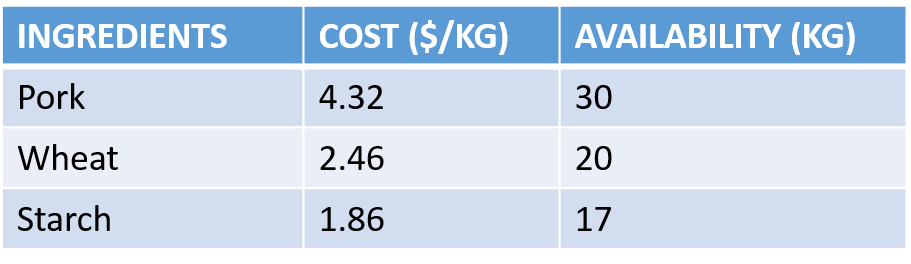
</div>

We’ll make 2 types of sausage.
Economy (>40% Pork)
Premium (>60% Pork)
One sausage is 50 grams (0.05 kg)
According to government regulations, the most starch we can use in our sausages is 25%
We have a contract with a butcher, and have already purchased 23 kg pork, that must go in our sausages.
We have a demand for 350 economy sausages and 500 premium sausages.
We need to figure out how to most cost effectively blend our sausages.
<div>
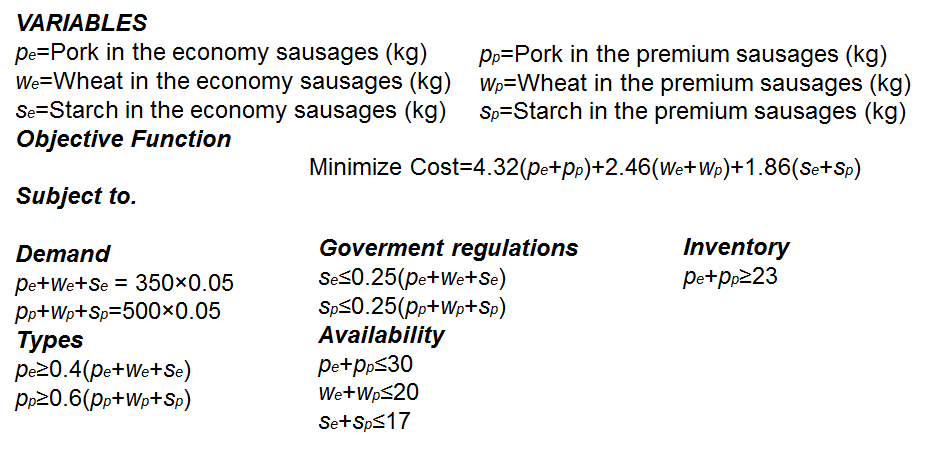
</div>



In [1]:
import pulp

In [2]:
# Instantiate our problem class
model = pulp.LpProblem("Cost_minimising_blending_problem", pulp.LpMinimize)

In [3]:
# Construct our decision variable lists
sausage_types = ['economy', 'premium']
ingredients = ['pork', 'wheat', 'starch']

In [4]:
ing_weight = pulp.LpVariable.dicts("weight kg",
                                     ((i, j) for i in sausage_types for j in ingredients),
                                     lowBound=0,
                                     cat='Continuous')
ing_weight

{('economy', 'pork'): weight_kg_('economy',_'pork'),
 ('economy', 'wheat'): weight_kg_('economy',_'wheat'),
 ('economy', 'starch'): weight_kg_('economy',_'starch'),
 ('premium', 'pork'): weight_kg_('premium',_'pork'),
 ('premium', 'wheat'): weight_kg_('premium',_'wheat'),
 ('premium', 'starch'): weight_kg_('premium',_'starch')}

In [5]:
# Objective Function
model += (
    pulp.lpSum([
        4.32 * ing_weight[(i, 'pork')]
        + 2.46 * ing_weight[(i, 'wheat')]
        + 1.86 * ing_weight[(i, 'starch')]
        for i in sausage_types])
)

In [6]:
# Constraints
# 350 economy and 500 premium sausages at 0.05 kg
model += pulp.lpSum([ing_weight['economy', j] for j in ingredients]) == 350 * 0.05
model += pulp.lpSum([ing_weight['premium', j] for j in ingredients]) == 500 * 0.05

# Economy has >= 40% pork, premium >= 60% pork
model += ing_weight['economy', 'pork'] >= (
    0.4 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'pork'] >= (
    0.6 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# Sausages must be <= 25% starch
model += ing_weight['economy', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['economy', j] for j in ingredients]))

model += ing_weight['premium', 'starch'] <= (
    0.25 * pulp.lpSum([ing_weight['premium', j] for j in ingredients]))

# We have at most 30 kg of pork, 20 kg of wheat and 17 kg of starch available
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) <= 30
model += pulp.lpSum([ing_weight[i, 'wheat'] for i in sausage_types]) <= 20
model += pulp.lpSum([ing_weight[i, 'starch'] for i in sausage_types]) <= 17

# We have at least 23 kg of pork to use up
model += pulp.lpSum([ing_weight[i, 'pork'] for i in sausage_types]) >= 23

In [7]:
# Solve our problem
model.solve()
pulp.LpStatus[model.status]

'Optimal'

In [8]:
for var in ing_weight:
    var_value = ing_weight[var].varValue
    print ("The weight of {0} in {1} sausages is {2} kg".format(var[1], var[0], var_value))

The weight of pork in economy sausages is 7.0 kg
The weight of wheat in economy sausages is 6.125 kg
The weight of starch in economy sausages is 4.375 kg
The weight of pork in premium sausages is 16.0 kg
The weight of wheat in premium sausages is 2.75 kg
The weight of starch in premium sausages is 6.25 kg


In [9]:
total_cost = pulp.value(model.objective)

print ("The total cost is ${} for 350 economy sausages and 500 premium sausages".format(round(total_cost, 2)))

The total cost is $140.96 for 350 economy sausages and 500 premium sausages


In [10]:
import csv
import pandas as pd
o = [{'name':name, 'shadow price':c.pi} for name, c in model.constraints.items()]
print(pd.DataFrame(o))

   name  shadow price
0   _C1          2.31
1   _C2          2.31
2   _C3          0.00
3   _C4          0.00
4   _C5         -0.60
5   _C6         -0.60
6   _C7          0.00
7   _C8          0.00
8   _C9          0.00
9  _C10          1.86


In [11]:
model.constraints.items()

odict_items([('_C1', 1*weight_kg_('economy',_'pork') + 1*weight_kg_('economy',_'starch') + 1*weight_kg_('economy',_'wheat') + -17.5 = 0), ('_C2', 1*weight_kg_('premium',_'pork') + 1*weight_kg_('premium',_'starch') + 1*weight_kg_('premium',_'wheat') + -25.0 = 0), ('_C3', 0.6*weight_kg_('economy',_'pork') + -0.4*weight_kg_('economy',_'starch') + -0.4*weight_kg_('economy',_'wheat') + 0.0 >= 0), ('_C4', 0.4*weight_kg_('premium',_'pork') + -0.6*weight_kg_('premium',_'starch') + -0.6*weight_kg_('premium',_'wheat') + 0.0 >= 0), ('_C5', -0.25*weight_kg_('economy',_'pork') + 0.75*weight_kg_('economy',_'starch') + -0.25*weight_kg_('economy',_'wheat') + 0.0 <= 0), ('_C6', -0.25*weight_kg_('premium',_'pork') + 0.75*weight_kg_('premium',_'starch') + -0.25*weight_kg_('premium',_'wheat') + 0.0 <= 0), ('_C7', 1*weight_kg_('economy',_'pork') + 1*weight_kg_('premium',_'pork') + -30 <= 0), ('_C8', 1*weight_kg_('economy',_'wheat') + 1*weight_kg_('premium',_'wheat') + -20 <= 0), ('_C9', 1*weight_kg_('econo